# Lab 04: Connected Component Labelling
Name: **Raja Hasnain Anwar**<br/>
Registration: **192135**

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

Function to get connected components using 2-neighbors and label them individually

In [2]:
def findComponents(file_path, threshold=128):
    img = Image.open(file_path).convert('L')
    width, height = img.size
    print(width, height)
    img_np = np.array(img, dtype=np.uint8).T
    img_np[ img_np >= threshold ] = 255; background = 255 # make background totally white
    img_np[ img_np < threshold ] = 0; foreground = 0
    
    img_np = np.pad(img_np, 1, 'constant', constant_values=0) # pad with zeros
    
    mask = np.zeros((width, height), dtype=np.uint8) # output mask
    preferences = dict() # dictionary for second pass
    label = 1 # current label
    
    # first pass
    for x in range(1,width):
        for y in range(1,height):
            if img_np[x,y] == background:
                continue
            
            if mask[x-2, y-1] == foreground and mask[x-1, y-2] == foreground:
                mask[x-1,y-1] = label
                label += 1
            elif mask[x-2, y-1] == foreground and mask[x-1, y-2] != foreground:
                mask[x-1,y-1] = mask[x-1, y-2]
            elif mask[x-2, y-1] != foreground and mask[x-1, y-2] == foreground:
                mask[x-1,y-1] = mask[x-2, y-1]
            else:
                mask[x-1,y-1] = min(mask[x-2, y-1], mask[x-1, y-2])
                preferences[max(mask[x-2, y-1], mask[x-1, y-2])] =  mask[x-1,y-1]
    
    # second pass
    for x in range(width):
        for y in range(height):
            try:
                mask[x,y] = preferences[ mask[x,y] ]
            except:
                continue
    
    plt.imshow(mask.T, cmap='nipy_spectral')

508 331


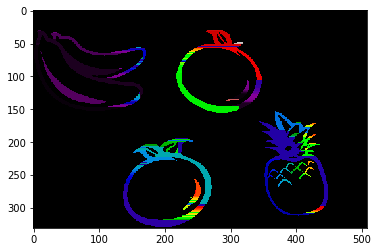

In [3]:
findComponents('Lab4-image.png', 128)